### Compare fft-conv and conv-pytorch along diverse kernel sizes

In [1]:
import torch
from fft_conv_pytorch import fft_conv, FFTConv1d, FFTConv2d
import time
import matplotlib.pyplot as plt

In [2]:
def test_fft_conv2d(signal, kernel_size = 3):
    
    kernel = torch.randn(2, 3, kernel_size, kernel_size)
    bias = torch.randn(2)
    
    my_fft_conv = FFTConv2d(3, 2, kernel_size, bias=True)
    my_fft_conv.weight = torch.nn.Parameter(kernel)
    my_fft_conv.bias = torch.nn.Parameter(bias)
    
    # my_fft_conv.to(device='cuda')
    # signal.to(device='cuda')
    
    start_time = time.time()
    iters = 16
    for _ in range(iters):
        out = my_fft_conv(signal)
    end_time = time.time()
    
    return (end_time - start_time) / iters * 1000

def test_torch_conv2d(signal, kernel_size = 3):
    
    kernel = torch.randn(2, 3, kernel_size, kernel_size)
    bias = torch.randn(2)
    
    my_torch_conv = torch.nn.Conv2d(3, 2, kernel_size, bias=True)
    my_torch_conv.weight = torch.nn.Parameter(kernel)
    my_torch_conv.bias = torch.nn.Parameter(bias)
    
    # my_torch_conv.to(device='cuda')
    # signal.to(device='cuda')
    
    start_time = time.time()
    iters = 16
    for _ in range(iters):
        out = my_torch_conv(signal)
    end_time = time.time()
    
    return (end_time - start_time) / iters * 1000

In [4]:
signal = torch.randn(3, 3, 512, 512)
time_fftconv = []
time_torchconv = []
for k in range(5, 20, 2):
    time_fftconv.append(test_fft_conv2d(signal=signal, kernel_size=k))
    time_torchconv.append(test_torch_conv2d(signal=signal, kernel_size=k))

Text(0.5, 1.0, 'conv time along different kernel sizes')

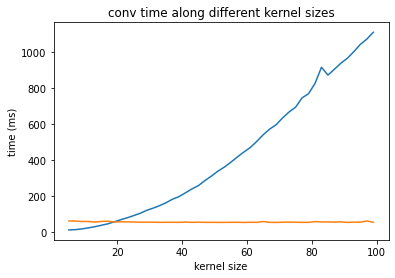

In [107]:
times = list(range(5, 100, 2))
plt.plot(times, time_torchconv)
plt.plot(times, time_fftconv)
plt.xlabel('kernel size')
plt.ylabel('time (ms)')
plt.title('conv time along different kernel sizes')

In [103]:
time_torchconv

[12.079671025276184,
 13.650298118591309,
 17.592325806617737,
 23.455768823623657,
 29.82383966445923,
 37.72835433483124,
 45.84415256977081,
 56.81881308555603,
 68.9048171043396,
 79.34755086898804,
 91.48773550987244,
 104.27552461624146,
 120.5986738204956,
 132.8955590724945,
 146.7130035161972,
 162.97245025634766,
 182.6190948486328,
 196.9209462404251,
 218.0224061012268,
 239.68347907066345,
 258.07730853557587,
 285.93942523002625,
 310.6178194284439,
 337.8407657146454,
 360.7510179281235,
 387.7753019332886,
 416.6145771741867,
 444.0266638994217,
 469.4087654352188,
 502.9013454914093,
 540.1643514633179,
 571.6679394245148,
 595.9310382604599,
 633.724108338356,
 666.9584512710571,
 692.9101198911667,
 744.8684275150299,
 768.1973278522491,
 824.9872177839279,
 914.7688001394272,
 871.4443445205688,
 904.0661305189133,
 937.5779777765274,
 964.8266285657883,
 1001.5587359666824,
 1041.8788492679596,
 1070.8399713039398,
 1109.213948249817]

In [104]:
k = 10
test_torch_conv2d(signal=signal, kernel_size=k)

21.821632981300354